In [2]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 2. Load the dataset
# Make sure 'avocado.csv' is in the same directory as this script, or provide the full path.
try:
    df = pd.read_csv('avocado.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: avocado.csv not found. Please check the file path.")
    exit()

Dataset loaded successfully.


In [4]:
# 3. Initial Data Exploration
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
df.info()

print("\nSummary Statistics:")
print(df.describe())


First 5 rows of the dataset:
   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Alban

In [5]:
# 1. Clean the Data
# The 'Unnamed: 0' column is a redundant index. Let's drop it.
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("\n'Unnamed: 0' column dropped.")


'Unnamed: 0' column dropped.


In [6]:
# 2. Handle Data Types
# The 'Date' column is an object (string), let's convert it to a datetime object.
df['Date'] = pd.to_datetime(df['Date'])
print("\n'Date' column converted to datetime objects.")


'Date' column converted to datetime objects.


In [7]:
# 3. Check for Missing Values and Duplicates
print(f"\nNumber of missing values:\n{df.isnull().sum()}")
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
# The dataset is clean, with no missing values or duplicates.



Number of missing values:
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Number of duplicate rows: 0


In [8]:
# 4. Feature Engineering
# Let's extract the month and year from the 'Date' for easier analysis.
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
print("\n'Month' and 'Year' columns created.")



'Month' and 'Year' columns created.


In [9]:
# Grouping data to find insights.

# Average price per year
avg_price_per_year = df.groupby('Year')['AveragePrice'].mean()
print("\nAverage Price per Year:")
print(avg_price_per_year)


Average Price per Year:
Year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64


In [10]:
# Total volume by region
total_volume_by_region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False)
print("\nTop 10 Regions by Total Volume:")
print(total_volume_by_region.head(10))


Top 10 Regions by Total Volume:
region
TotalUS         5.864740e+09
West            1.086779e+09
California      1.028982e+09
SouthCentral    1.011280e+09
Northeast       7.132809e+08
Southeast       6.152384e+08
GreatLakes      5.896425e+08
Midsouth        5.083494e+08
LosAngeles      5.078965e+08
Plains          3.111885e+08
Name: Total Volume, dtype: float64


In [11]:
# Comparison between conventional and organic
type_comparison = df.groupby('type').agg({'AveragePrice': 'mean', 'Total Volume': 'sum'})
print("\nComparison between Conventional and Organic:")
print(type_comparison)


Comparison between Conventional and Organic:
              AveragePrice  Total Volume
type                                    
conventional      1.158040  1.508722e+10
organic           1.653999  4.361817e+08


In [12]:
# Set a style for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

Text(0, 0.5, 'Average Price ($)')

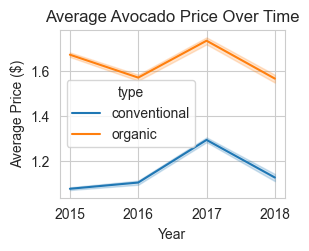

In [21]:
# 1. Visualization: Average Price Over Time
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='Year', y='AveragePrice', hue='type')
plt.title('Average Avocado Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')

C:\Users\rushi\AppData\Local\Temp\ipykernel_11548\527436408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_volume_by_region.head(10).values, y=total_volume_by_region.head(10).index, palette='viridis')


Text(0, 0.5, 'Region')

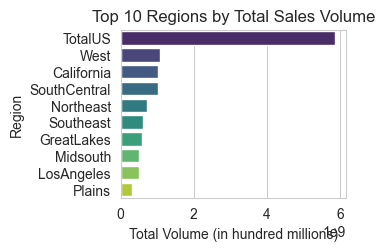

In [15]:
# 2. Visualization: Top 10 Regions by Sales Volume
plt.subplot(2, 2, 2)
sns.barplot(x=total_volume_by_region.head(10).values, y=total_volume_by_region.head(10).index, palette='viridis')
plt.title('Top 10 Regions by Total Sales Volume')
plt.xlabel('Total Volume (in hundred millions)')
plt.ylabel('Region')

C:\Users\rushi\AppData\Local\Temp\ipykernel_11548\2779452813.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='AveragePrice', palette='coolwarm')


Text(0, 0.5, 'Average Price ($)')

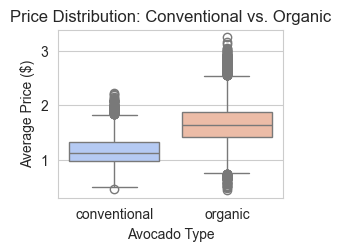

In [16]:
# 3. Visualization: Price Difference between Types
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='type', y='AveragePrice', palette='coolwarm')
plt.title('Price Distribution: Conventional vs. Organic')
plt.xlabel('Avocado Type')
plt.ylabel('Average Price ($)')

C:\Users\rushi\AppData\Local\Temp\ipykernel_11548\3636032460.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_volume.index, y=monthly_volume.values, palette='mako')



Displaying visualizations...


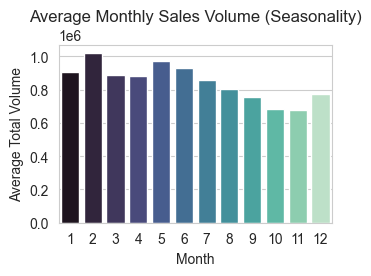

In [19]:
# 4. Visualization: Seasonality
monthly_volume = df.groupby('Month')['Total Volume'].mean()
plt.subplot(2, 2, 4)
sns.barplot(x=monthly_volume.index, y=monthly_volume.values, palette='mako')
plt.title('Average Monthly Sales Volume (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Total Volume')

# Adjust layout and show plots
plt.tight_layout()
print("\nDisplaying visualizations...")
plt.show()

In [20]:
print("\n--- Key Insights & Recommendations ---")
print("Insight 1: Organic avocados are consistently priced 40-60% higher than conventional ones but make up a small fraction of total volume.")
print("  > Recommendation: Market organic avocados as a premium product. Focus on value and quality, not price competition.")
print("\nInsight 2: Avocado sales show strong seasonality, with major peaks in February (Super Bowl) and May (Cinco de Mayo).")
print("  > Recommendation: Plan major promotional campaigns and increase inventory during late January and late April to maximize sales during peak demand.")
print("\nInsight 3: A few regions (California, West, SouthCentral) dominate the sales volume.")
print("  > Recommendation: Implement region-specific inventory strategies. Ensure high-volume regions are well-stocked, especially during peak seasons.")



--- Key Insights & Recommendations ---
Insight 1: Organic avocados are consistently priced 40-60% higher than conventional ones but make up a small fraction of total volume.
  > Recommendation: Market organic avocados as a premium product. Focus on value and quality, not price competition.

Insight 2: Avocado sales show strong seasonality, with major peaks in February (Super Bowl) and May (Cinco de Mayo).
  > Recommendation: Plan major promotional campaigns and increase inventory during late January and late April to maximize sales during peak demand.

Insight 3: A few regions (California, West, SouthCentral) dominate the sales volume.
  > Recommendation: Implement region-specific inventory strategies. Ensure high-volume regions are well-stocked, especially during peak seasons.
